In [ ]:
import tensorflow as tf

tf.__version__

'2.12.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Independent features and Dependent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
from re import T
#Feature Engineering

Geo = pd.get_dummies(X['Geography'], drop_first=True)
Gen = pd.get_dummies(X['Gender'], drop_first=True)

In [ ]:
# Concatenate to main dataset X

X = X.drop(['Geography', 'Gender'], axis=1)
print(X.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  
0               1        101348.88  
1               1        112542.58  
2               0        113931.57  
3               0         93826.63  
4               1         79084.10  


In [ ]:
X = pd.concat([X,Geo,Gen], axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#Train and Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(7500, 11)

In [ ]:
X_test.shape

(2500, 11)

In [ ]:
y_train.shape

(7500,)

In [ ]:
y_test.shape

(2500,)

In [ ]:
#ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, LeakyReLU
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(units=11, activation='relu')) # Input layer
model.add(Dense(units=7, activation='relu'))   #Hidden layer
model.add(Dense(units=3, activation='relu'))
model.add(Dense(1,activation='sigmoid'))  # Output layer

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_history = model.fit(X_train, y_train, validation_split=0.36, batch_size=32, epochs=27)

Epoch 1/27
150/150 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.8669 - val_loss: 0.3617 - val_accuracy: 0.8519
Epoch 2/27
150/150 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.8673 - val_loss: 0.3623 - val_accuracy: 0.8522
Epoch 3/27
150/150 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.8658 - val_loss: 0.3618 - val_accuracy: 0.8515
Epoch 4/27
150/150 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.8681 - val_loss: 0.3622 - val_accuracy: 0.8522
Epoch 5/27
150/150 [==============================] - 1s 3ms/step - loss: 0.3146 - accuracy: 0.8656 - val_loss: 0.3623 - val_accuracy: 0.8530
Epoch 6/27
150/150 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8677 - val_loss: 0.3624 - val_accuracy: 0.8522
Epoch 7/27
150/150 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8660 - val_loss: 0.3619 - val_accuracy: 0.8522
Epoch 

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

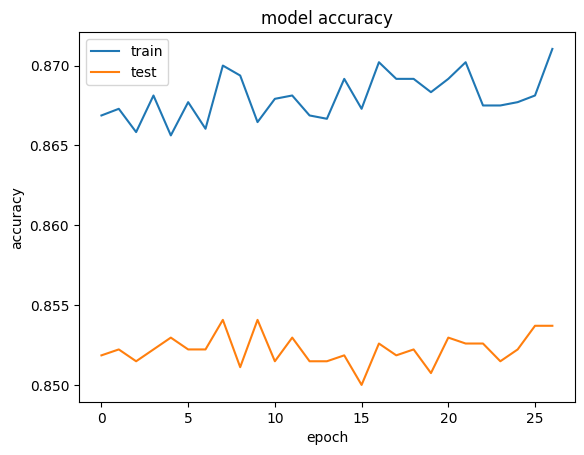

In [ ]:
#accuracy plot

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#prediction

y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)

79/79 [==============================] - 0s 1ms/step


In [ ]:
X_test.shape

(2500, 11)

In [ ]:
y_test.shape

(2500,)

In [ ]:
#confusion matix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
a = accuracy_score(y_test, y_pred)
cm = classification_report(y_test, y_pred)
cmm = confusion_matrix(y_test, y_pred)

In [ ]:
a

0.8524

In [ ]:
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1991
           1       0.67      0.54      0.60       509

    accuracy                           0.85      2500
   macro avg       0.78      0.74      0.75      2500
weighted avg       0.84      0.85      0.85      2500



In [ ]:
cmm

array([[1855,  136],
       [ 233,  276]])

In [ ]:
model.get_weights()

[array([[-1.15877204e-01, -1.06177591e-01,  4.08885986e-01,
          1.17159247e-01, -9.99356732e-02, -4.23894882e-01,
          2.01476842e-01, -2.89043467e-02, -4.56333935e-01,
          5.55523992e-01,  7.49967992e-02],
        [ 1.40754139e+00, -4.98977035e-01, -6.89377487e-01,
         -6.88837543e-02,  7.04463184e-01, -1.34932727e-01,
          3.29225212e-02,  5.63768983e-01, -2.19657123e-01,
          4.52331185e-01,  1.86395168e-01],
        [-1.36934549e-01,  1.50693297e-01, -1.40662864e-02,
         -1.03869252e-01, -2.35554129e-02, -5.52505314e-01,
          1.60001040e-01, -6.35733232e-02,  6.96845472e-01,
         -6.95687458e-02,  9.56392512e-02],
        [-2.72093356e-01,  4.48700599e-02,  6.35454506e-02,
          5.21337986e-01, -1.62243128e-01, -4.17716146e-01,
         -1.12265146e+00, -1.01585202e-01, -5.35431862e-01,
          5.53581834e-01, -4.81844306e-01],
        [-5.60236633e-01,  7.68193007e-01,  1.95995927e-01,
         -1.06682360e-01,  8.61077845e-01, -